In [562]:
#imports
import pandas as pd
import numpy as np
import keras
from keras import layers
import tensorflow as tf
import phik
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error


<b>Regression Zillow</b>

In [563]:
df = pd.read_csv("Clean_Zillow.csv")
df.head()

longitude  countyFIPS  monthlyHoaFee  annualHomeownersInsurance state  \
0 -149.90807      2020.0            0.0                       2840    AK   
1 -149.90822      2020.0            0.0                       2934    AK   
2 -149.90833      2020.0            0.0                       4187    AK   
3 -149.90834      2020.0            0.0                       2920    AK   
4 -149.90749      2020.0            0.0                       4100    AK   

   yearBuilt   latitude  rentZestimate       city  zestimateLowPercent  ...  \
0     1959.0  61.217308         3142.0  Anchorage                 12.0  ...   
1     1961.0  61.217136         3113.0  Anchorage                 12.0  ...   
2     1983.0  61.217000         4282.0  Anchorage                 12.0  ...   
3     1947.0  61.216720         3458.0  Anchorage                 15.0  ...   
4     2000.0  61.217120         4161.0  Anchorage                 18.0  ...   

   bedrooms   price  zestimateHighPercent  homeType_APARTMENT  homeType_CONDO  \
0       3.0  676100                  13.0                   0               0   
1       3.0  698600                  13.0                   0               0   
2       4.0  996800                  14.0                   0               0   
3       5.0  695300                  16.0                   0               0   
4       4.0  976100                  24.0                   0               1   

   homeType_LOT  homeType_MANUFACTURED  homeType_MULTI_FAMILY  \
0             0                      0                      0   
1             0                      0                      0   
2             0                      0                      0   
3             0                      0                      0   
4             0                      0                      0   

   homeType_SINGLE_FAMILY  homeType_TOWNHOUSE  
0                       1                   0  
1                       1                   0  
2                       1                   0  
3                       1                   0  
4                       0                   0  

[5 rows x 26 columns]

<b>From excercise 1 +2</b>
<p>I will still use the "cleaned" zillow since these columns had to be dropped</p>

In [564]:
# Example: Combine the sparse columns into an "Other" category
sparse_columns = ['homeType_LOT', 'homeType_MANUFACTURED', 'homeType_APARTMENT','homeType_TOWNHOUSE','homeType_MULTI_FAMILY']

# Create a new 'Other' column that combines the sparse categories
df['homeType_OTHER'] = df[sparse_columns].sum(axis=1)

# Drop the original sparse columns
df = df.drop(columns=sparse_columns)

In [565]:
#needDrop=["state","city"]
#df=df.drop(needDrop,axis=1)

In [566]:
#dropable=["state","city",'yearBuilt','zestimateLowPercent','zestimate','zestimateHighPercent','latitude','zipcode','timeOnZillow']
#df=df.drop(dropable,axis=1)

run4=["state","city",'zestimateLowPercent','zestimate','zestimateHighPercent','homeType_OTHER']
df=df.drop(run4,axis=1)

<h3>New Checks from Excercise 3</h3>
Cluster Profiling

In [567]:
X = df.drop(["price"], axis=1)
y = df['price']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# create Kmeans-instance and train it with data
kmeans = KMeans(n_clusters=4, random_state=42)

# place the cluster values back to DataFrame
df['cluster'] = kmeans.fit_predict(X_scaled)

df.head(5)

longitude  countyFIPS  monthlyHoaFee  annualHomeownersInsurance  yearBuilt  \
0 -149.90807      2020.0            0.0                       2840     1959.0   
1 -149.90822      2020.0            0.0                       2934     1961.0   
2 -149.90833      2020.0            0.0                       4187     1983.0   
3 -149.90834      2020.0            0.0                       2920     1947.0   
4 -149.90749      2020.0            0.0                       4100     2000.0   

    latitude  rentZestimate  timeOnZillow  livingArea  zipcode  \
0  61.217308         3142.0        3609.0      2668.0    99501   
1  61.217136         3113.0        4334.0      3179.0    99501   
2  61.217000         4282.0        3758.0      3059.0    99501   
3  61.216720         3458.0        3543.0      1642.0    99501   
4  61.217120         4161.0        3953.0      4483.0    99501   

   propertyTaxRate  bathrooms  bedrooms   price  homeType_CONDO  \
0             1.31        2.0       3.0  676100               0   
1             1.31        2.0       3.0  698600               0   
2             1.31        3.0       4.0  996800               0   
3             1.31        2.0       5.0  695300               0   
4             1.31        4.0       4.0  976100               1   

   homeType_SINGLE_FAMILY  cluster  
0                       1        0  
1                       1        0  
2                       1        0  
3                       1        0  
4                       0        0

In [568]:
df['cluster'].value_counts()

cluster
3    3059
0    1015
1     801
2      68
Name: count, dtype: int64

In [569]:
cluster_counts = df.groupby(['price', 'cluster']).size().unstack(fill_value=0)
print(cluster_counts)

cluster  0  1  2  3
price              
1250     0  0  0  1
60000    0  0  1  0
79700    0  0  1  0
87100    0  1  0  0
90100    0  2  0  0
...     .. .. .. ..
1592300  0  0  1  0
1835600  1  0  0  0
1905800  1  0  0  0
2058500  1  0  0  0
2750000  1  0  0  0

[3196 rows x 4 columns]


In [570]:
# calculate the average of quality for each cluster
cluster_price_average = df.groupby('cluster')['price'].mean()

# place the averages based on clusters back into DataFrame
df['cluster_average_price'] = df['cluster'].map(cluster_price_average)

df.head(10)

longitude  countyFIPS  monthlyHoaFee  annualHomeownersInsurance  yearBuilt  \
0 -149.90807      2020.0            0.0                       2840     1959.0   
1 -149.90822      2020.0            0.0                       2934     1961.0   
2 -149.90833      2020.0            0.0                       4187     1983.0   
3 -149.90834      2020.0            0.0                       2920     1947.0   
4 -149.90749      2020.0            0.0                       4100     2000.0   
5 -149.90723      2020.0            0.0                       2535     2018.0   
6 -149.90723      2020.0            0.0                       3042     1961.0   
7 -149.90546      2020.0            0.0                       1865     1978.0   
8 -149.91057      2020.0            0.0                        862     1973.0   
9 -149.91037      2020.0            0.0                       1944     1930.0   

    latitude  rentZestimate  timeOnZillow  livingArea  zipcode  \
0  61.217308         3142.0        3609.0      2668.0    99501   
1  61.217136         3113.0        4334.0      3179.0    99501   
2  61.217000         4282.0        3758.0      3059.0    99501   
3  61.216720         3458.0        3543.0      1642.0    99501   
4  61.217120         4161.0        3953.0      4483.0    99501   
5  61.217003         3943.0        3011.0      2560.0    99501   
6  61.217140         3318.0        1512.0      3224.0    99501   
7  61.218330         3591.0        1201.0      2087.0    99501   
8  61.214520         1945.0        5089.0       899.0    99501   
9  61.215305         2128.0        3672.0       678.0    99501   

   propertyTaxRate  bathrooms  bedrooms   price  homeType_CONDO  \
0             1.31        2.0       3.0  676100               0   
1             1.31        2.0       3.0  698600               0   
2             1.31        3.0       4.0  996800               0   
3             1.31        2.0       5.0  695300               0   
4             1.31        4.0       4.0  976100               1   
5             1.31        3.5       3.0  603600               1   
6             1.31        3.0       6.0  724400               0   
7             1.31        3.0       2.0  444100               1   
8             1.31        1.0       2.0  205200               1   
9             1.31        1.0       1.0  462800               0   

   homeType_SINGLE_FAMILY  cluster  cluster_average_price  
0                       1        0          624584.137931  
1                       1        0          624584.137931  
2                       1        0          624584.137931  
3                       1        0          624584.137931  
4                       0        0          624584.137931  
5                       0        0          624584.137931  
6                       0        0          624584.137931  
7                       0        1          200110.153558  
8                       0        1          200110.153558  
9                       1        3          377817.897679

In [589]:
correlation = df['price'].corr(df['cluster_average_price'])
correlation

0.7581484490477197

<p>1. Run 76% wich is really really significant but imma try grouping the homelots and then run it again</p>

<p>2. Run, with grouped HOMETYPES we got to 78% wich is significantly better, and hardens my thought that we got rid of a lot of noise</p>

<p>3. Run, imma drop all the dropable from e1,2 and then run it again. 73% so the worse result yet, this makes sense, since the Zestimations where dropped, wich where already highly accurate so this makes it now harder for the AI</p>

<p>4. Run, only drop the necessarys + zestimations 72% still good but even worse result, but i do believe that much cutting is necessary at least for the AI to not just take the Zestimations and ignore everything else</p>

<p>5. Run, after pce outlier removal 79%</p>

<h3>PCA</h3>

In [572]:
#sample
#to make the copy code work
authentic_df = df.copy()
threshold = 53
sampled_data = []
for Price, group in authentic_df.groupby('price'):
    # if a minority group, just add all the data
    if len(group) <= threshold:
        sampled_data.append(group)
    else:
        sampled_data.append(group.sample(threshold))
authentic_sample = pd.concat(sampled_data)
authentic_df = authentic_df.drop(authentic_sample.index)

Explained variance ratio with 8 components, by each component:
[0.31027554 0.22632566 0.13283435 0.05917648 0.05643141 0.04837049
 0.03943637 0.03344002]

Explained variance ratio with 8 components, total result:
0.9062903187240617

Mean Squared Error (MSE) between original and reconstructed data:
0.09370968127593855


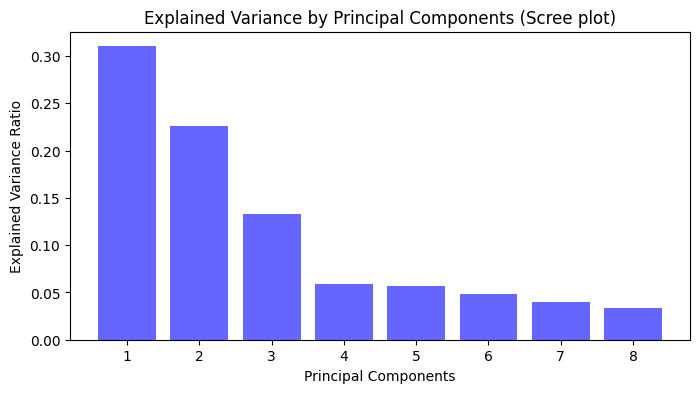

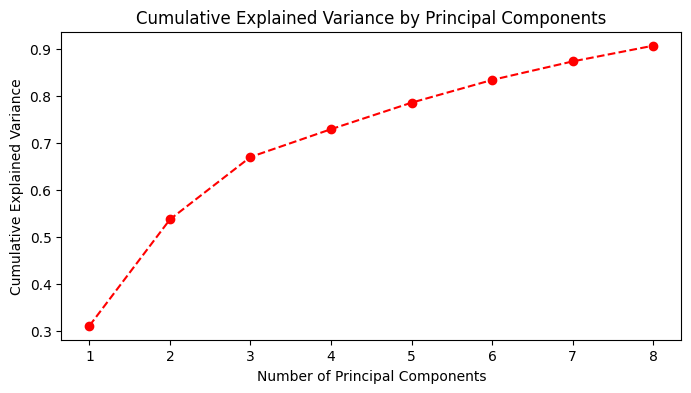

In [581]:
#same code as before
X = df.drop(["price"], axis=1)
y = df['price']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#just with the changed df


# same as with components, i think 
num_components = 8

# train the PCA -model
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_scaled)

# some basic metrics
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance ratio with {num_components} components, by each component:\n{explained_variance_ratio}")

print(f"\nExplained variance ratio with {num_components} components, total result:\n{sum(explained_variance_ratio)}")

# 0.798 ~~ 80% of data preserved, which means we lost 20% of variance in the process
# aim to have less than 10% lost, or even less than 5% lost

X_reconstructed = pca.inverse_transform(X_pca)

X_test = authentic_sample.drop(columns=["price"])

# other metric is MSE => keep this as close to 0 as possible
# basically measures how much error the PCA model makes compared to original data
mse = mean_squared_error(X_scaled, X_reconstructed)
print(f"\nMean Squared Error (MSE) between original and reconstructed data:\n{mse}")

# plot variance plots to see how much different components add to explainability
# plot 1: SCREE PLOT
plt.figure(figsize=(8, 4))
plt.bar(range(1, num_components + 1, ), explained_variance_ratio, alpha=0.6, color="b")
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance by Principal Components (Scree plot)")
plt.show()

# plot 2: cumulative explained variance
cumulative_variance = explained_variance_ratio.cumsum()
plt.figure(figsize=(8, 4))
plt.plot(range(1, num_components + 1, ), cumulative_variance, marker="o", linestyle='--', color="r")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance by Principal Components")
plt.show()

89% data preserved, 11% lost, adding more pca would feel very dumb, at first i only wanted to have 4

<p>After outlier removal 90/10</p>

In [582]:
#scale
# scale the test data 
#X_reconstructed = pca.inverse_transform(X_pca)

#X_test = authentic_sample.drop(columns=["price"])

#X_test_scaled = scaler_pca.transform(X_test)
#X_test_pca = pca.transform(X_test_scaled)
#X_test_reconstructed = pca.inverse_transform(X_test_pca)

In [583]:
# get the component loadings
loadings = pca.components_

# create a DataFrame
loadings_df = pd.DataFrame(
    loadings.T,
    columns=[f"PC{i + 1}" for i in range(loadings.shape[0])], index=X.columns
)

In [584]:
loadings_df

PC1       PC2       PC3       PC4       PC5  \
longitude                 -0.007102  0.501921  0.013044  0.062390 -0.030951   
countyFIPS                -0.011039  0.438787  0.026741  0.133208 -0.129630   
monthlyHoaFee             -0.187159  0.008514 -0.393363 -0.026831  0.010662   
annualHomeownersInsurance  0.390208  0.017278 -0.057111 -0.020244  0.036189   
yearBuilt                  0.063533  0.080126 -0.230355 -0.469559  0.687659   
latitude                   0.007110 -0.486250 -0.010947 -0.034805  0.001059   
rentZestimate              0.389081 -0.013552 -0.057209 -0.080460  0.097449   
timeOnZillow              -0.000941 -0.066122  0.038857  0.803571  0.584275   
livingArea                 0.386831 -0.000596 -0.148340  0.096124 -0.069747   
zipcode                    0.005270 -0.480972 -0.010348 -0.052016  0.014801   
propertyTaxRate            0.002566 -0.274117  0.003615  0.145105 -0.228198   
bathrooms                  0.342033  0.014480 -0.239190 -0.056437  0.001098   
bedrooms                   0.315236 -0.020856 -0.044933  0.149150 -0.210005   
homeType_CONDO            -0.271652 -0.014258 -0.454160  0.038435  0.019029   
homeType_SINGLE_FAMILY     0.199003 -0.002107  0.465142 -0.156600  0.210254   
cluster                   -0.149629 -0.011680  0.528332 -0.121488  0.083565   
cluster_average_price      0.394012  0.017070  0.006546  0.064372 -0.065208   

                                PC6       PC7       PC8  
longitude                  0.081861 -0.015879  0.019118  
countyFIPS                 0.348853 -0.045963  0.005530  
monthlyHoaFee             -0.077239 -0.472344  0.680184  
annualHomeownersInsurance -0.048327 -0.201152  0.006190  
yearBuilt                  0.328831  0.273747 -0.005141  
latitude                  -0.010311 -0.016055  0.006243  
rentZestimate              0.021303 -0.265501  0.089613  
timeOnZillow              -0.004839  0.007975  0.052410  
livingArea                -0.038837 -0.071492  0.073359  
zipcode                   -0.025902  0.029762 -0.034089  
propertyTaxRate            0.864434 -0.102776  0.048685  
bathrooms                  0.031264  0.173479  0.186045  
bedrooms                  -0.037576  0.562056  0.381581  
homeType_CONDO             0.001934 -0.049792 -0.161248  
homeType_SINGLE_FAMILY     0.039361 -0.432967  0.001696  
cluster                    0.024363  0.166042  0.509068  
cluster_average_price     -0.024990 -0.090795 -0.227569

<Axes: >

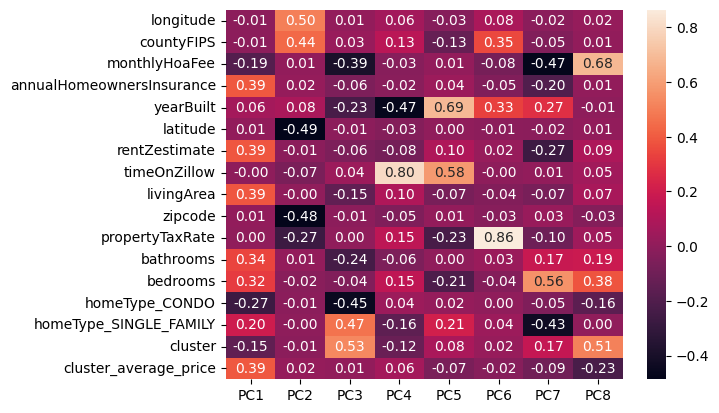

In [585]:
sns.heatmap(loadings_df, annot=True, fmt=".2f")

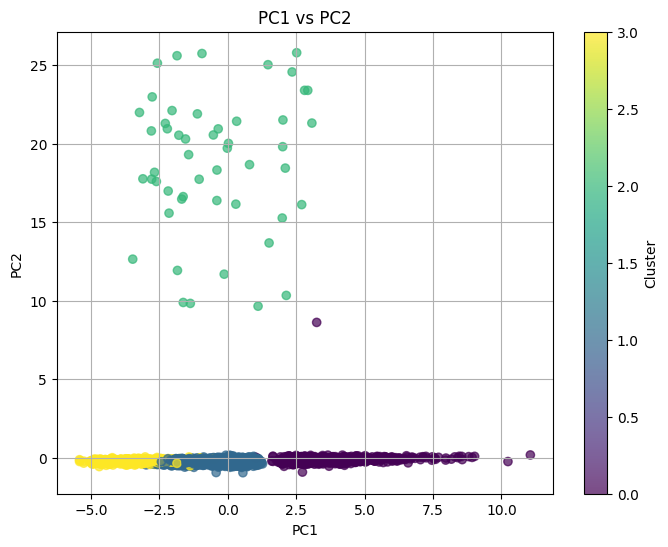

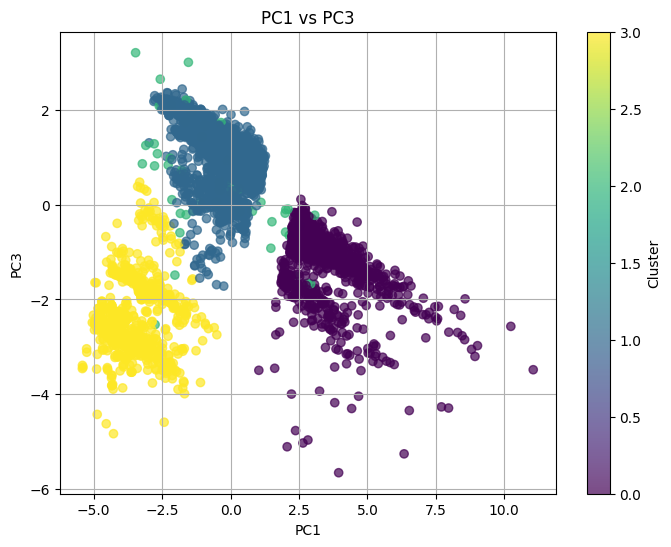

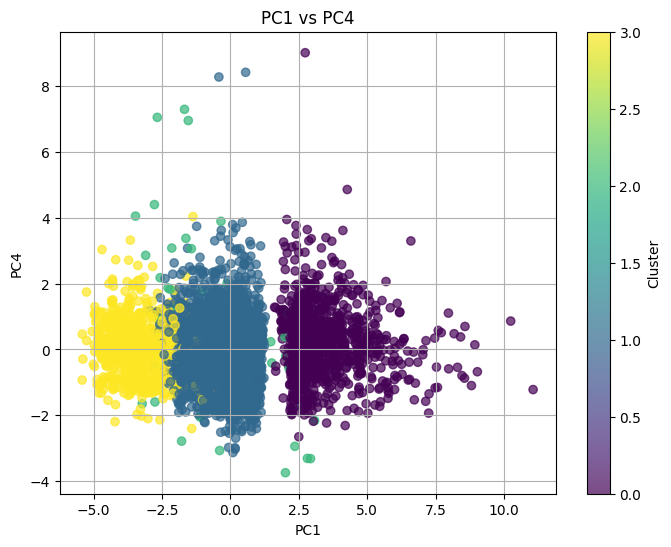

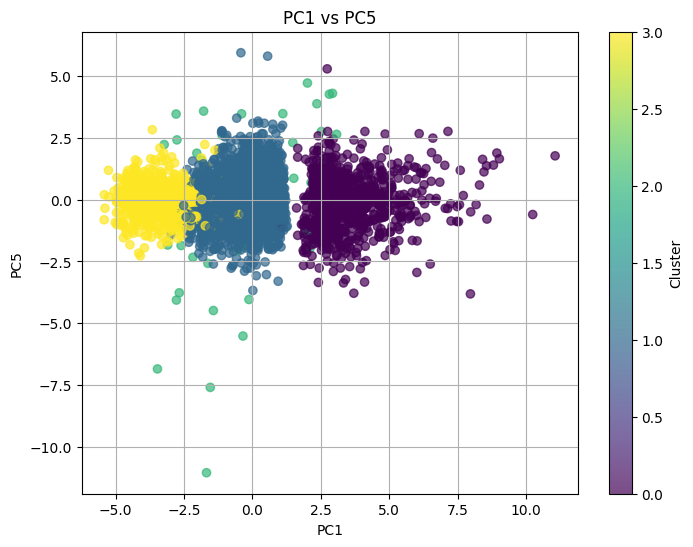

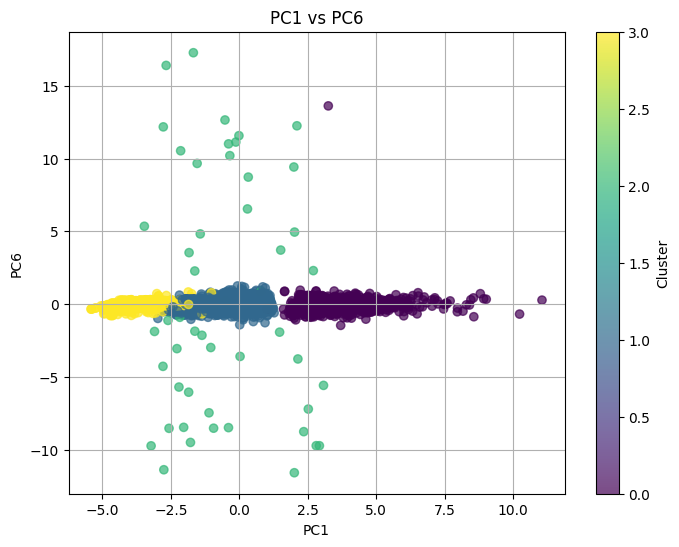

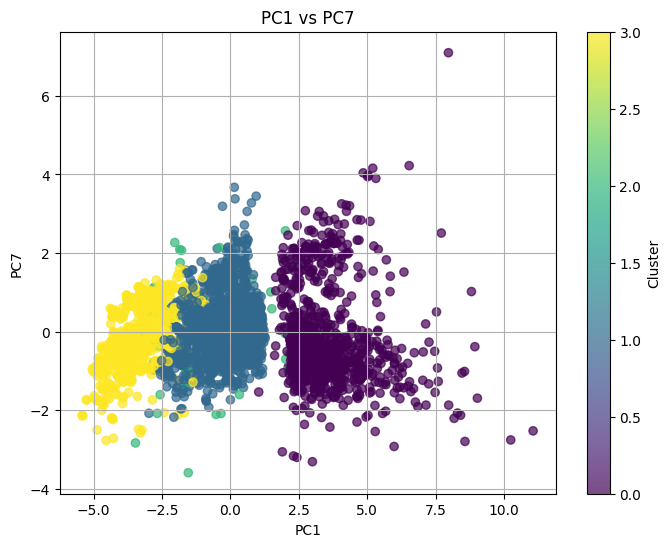

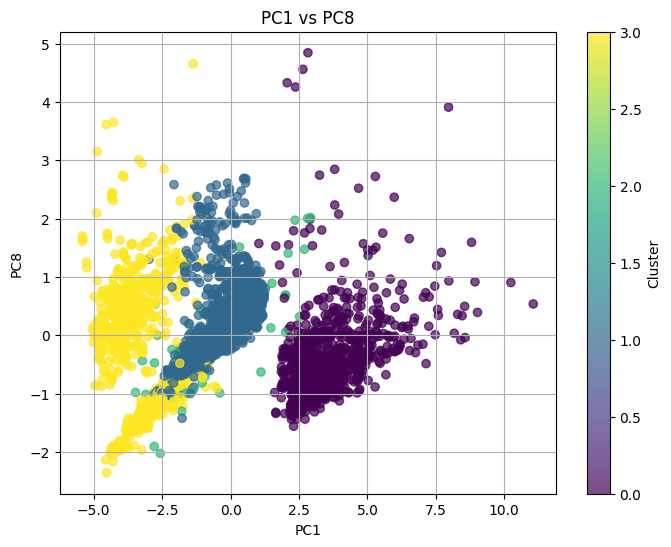

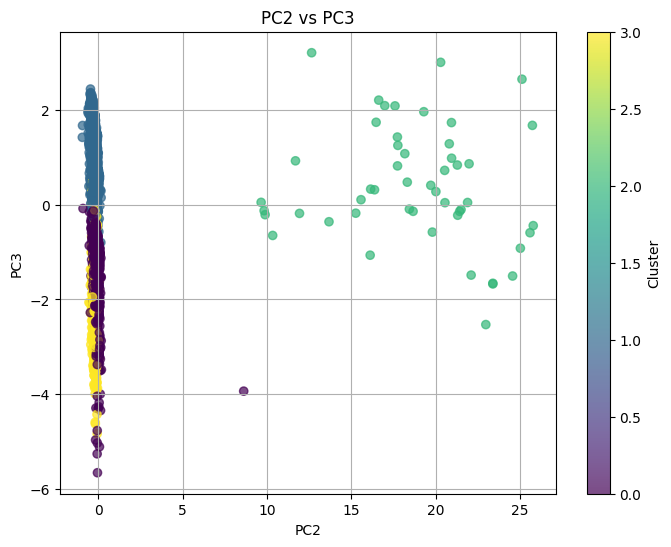

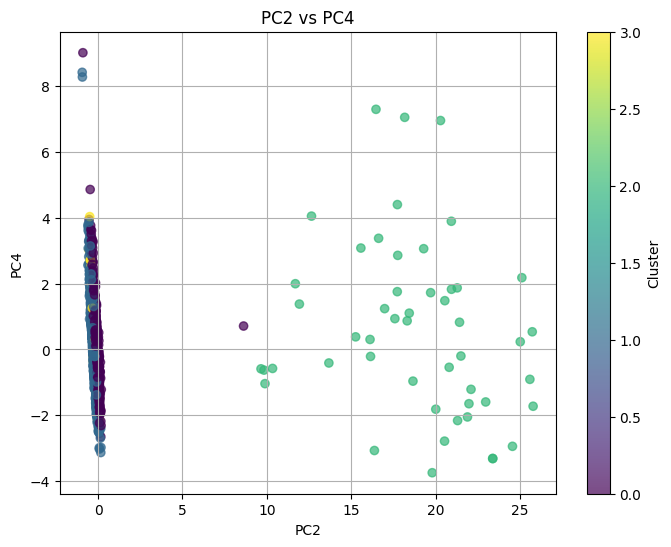

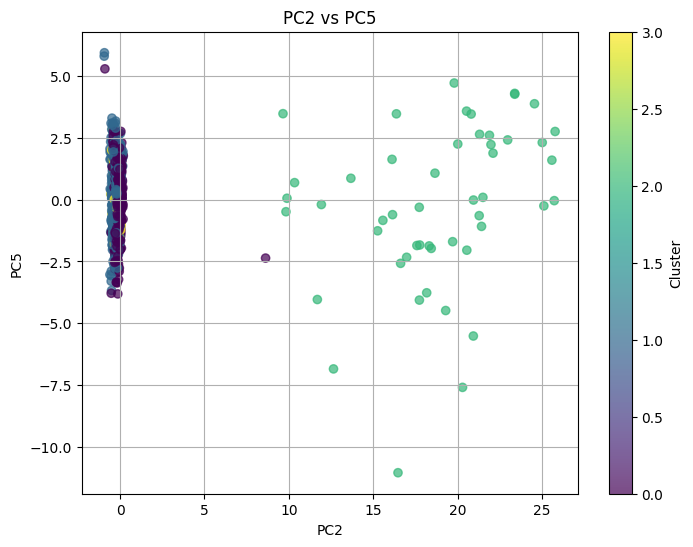

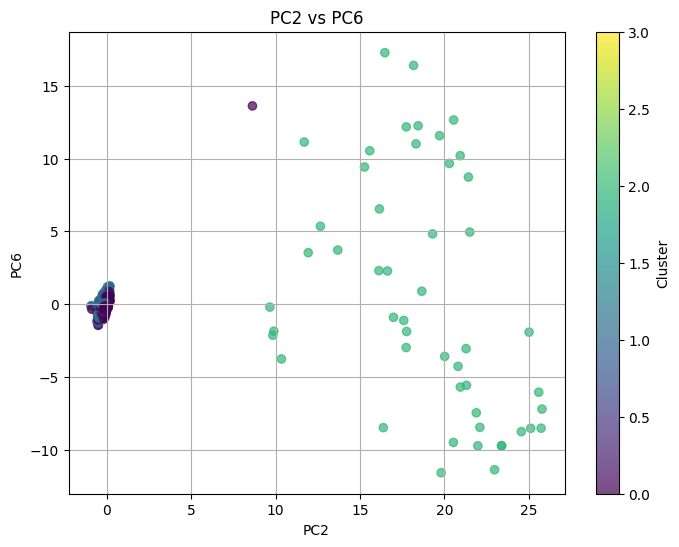

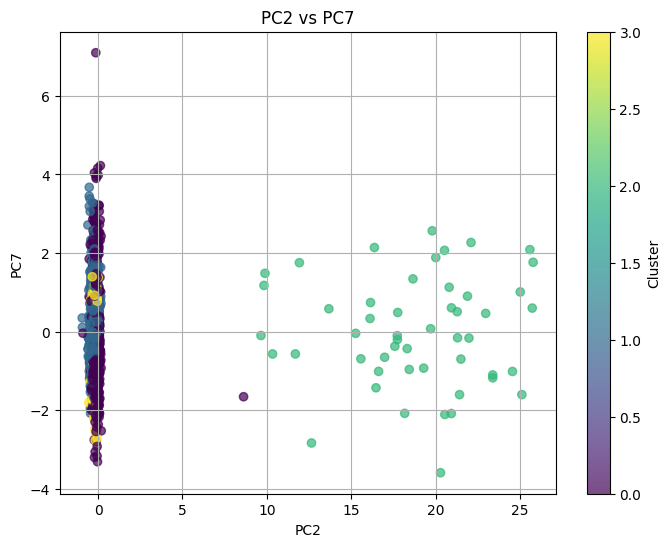

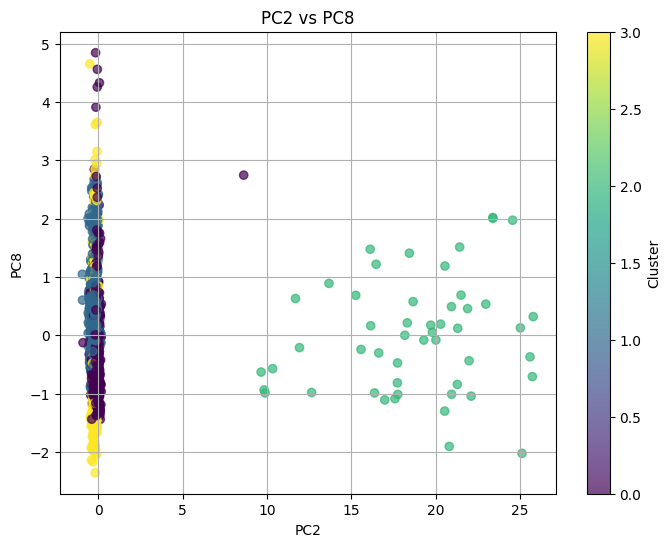

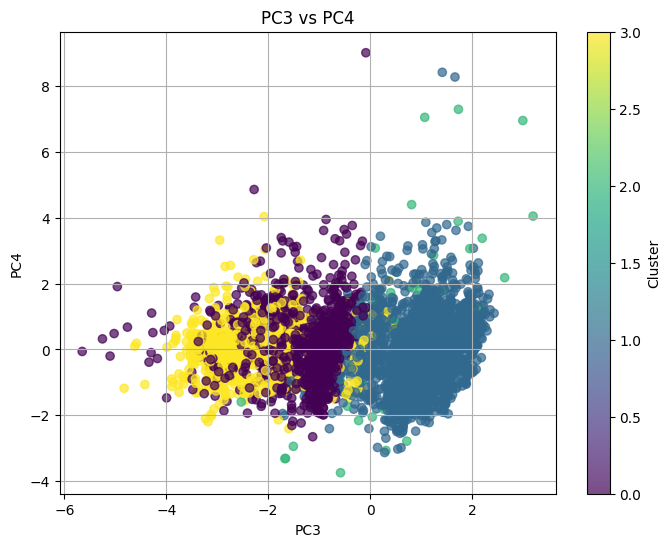

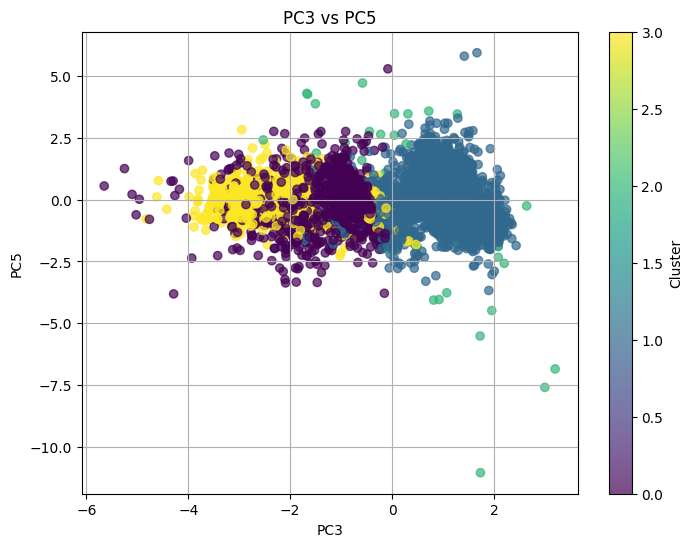

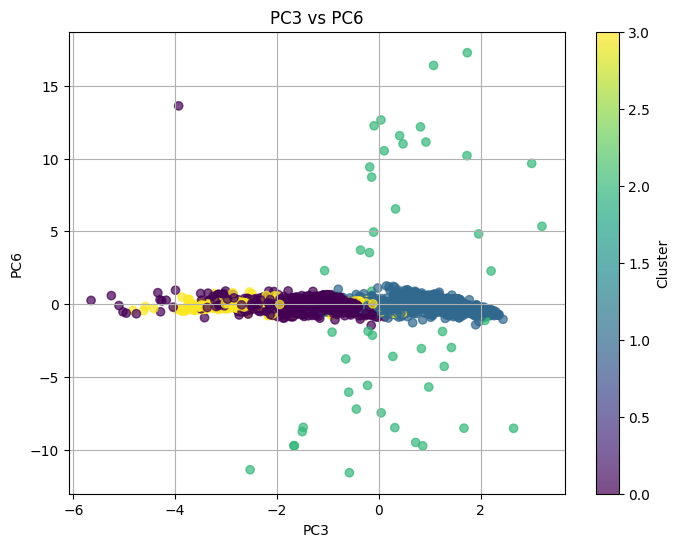

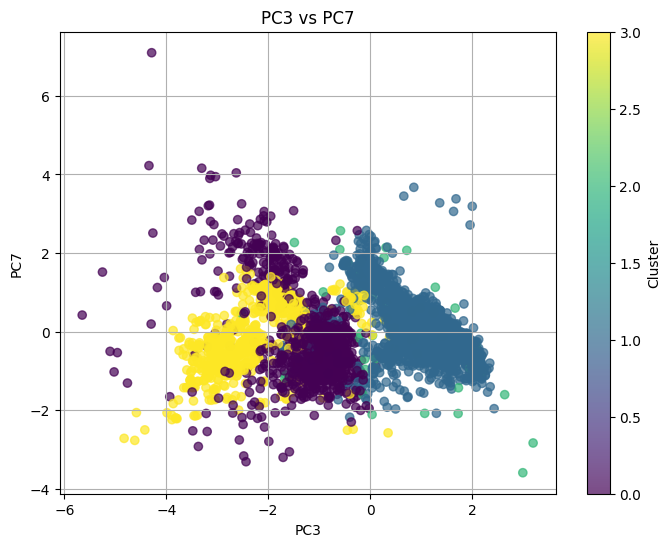

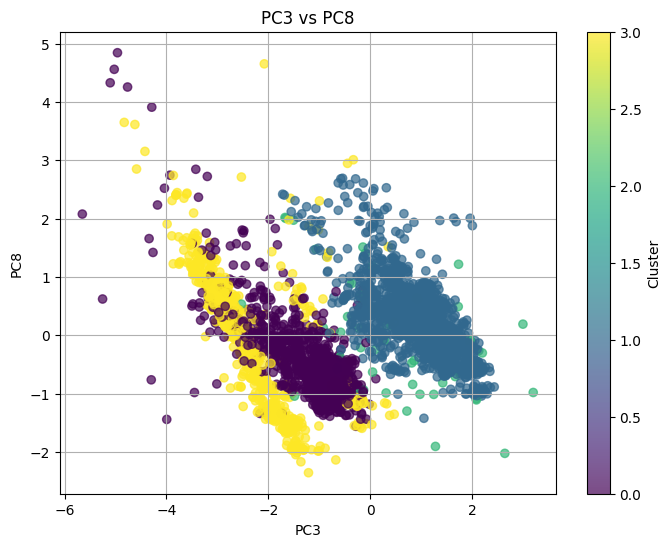

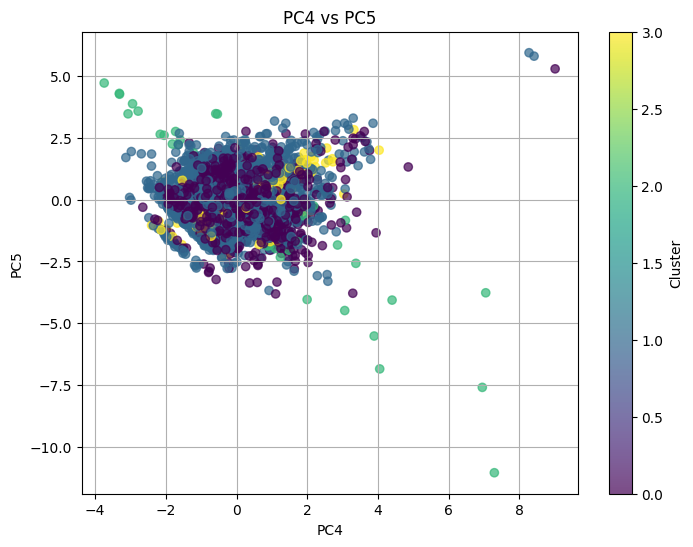

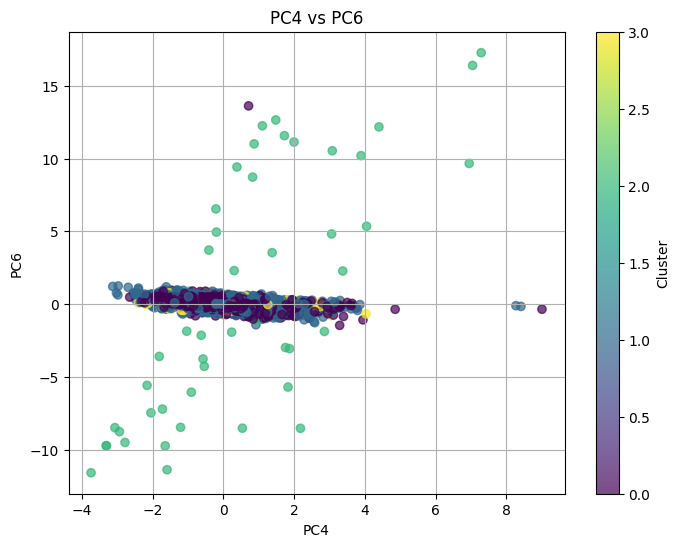

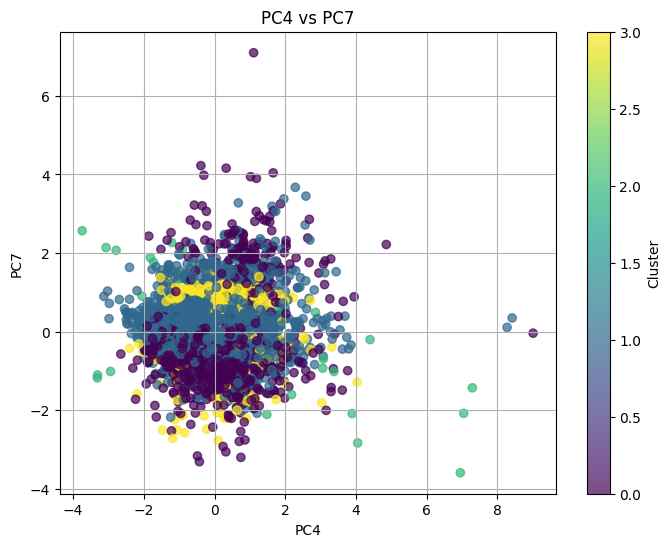

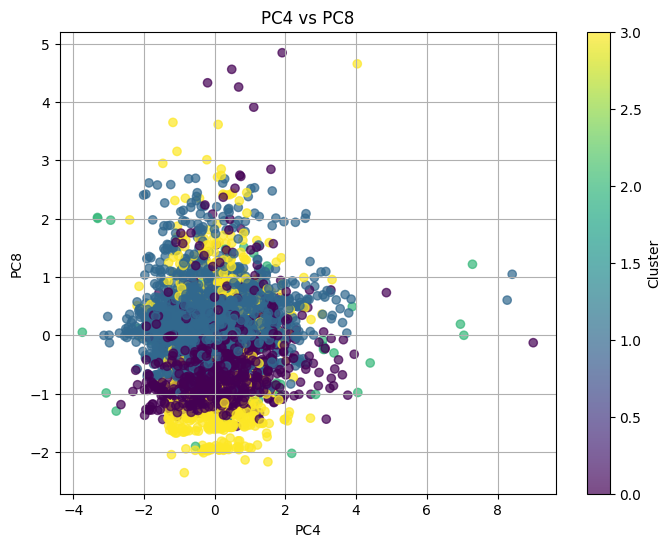

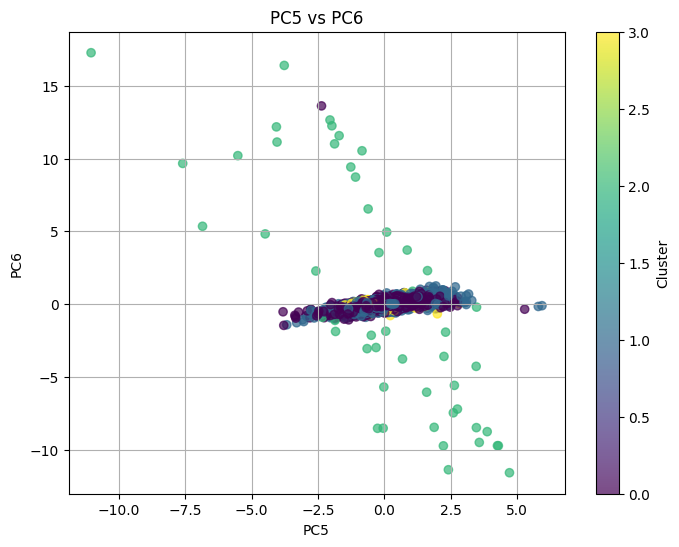

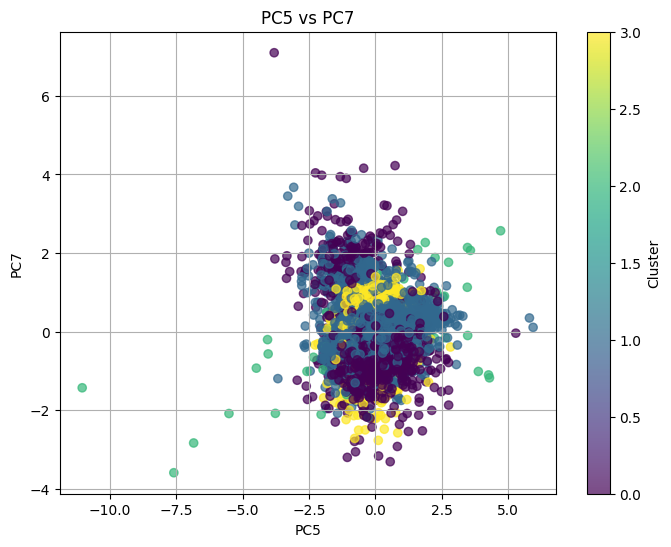

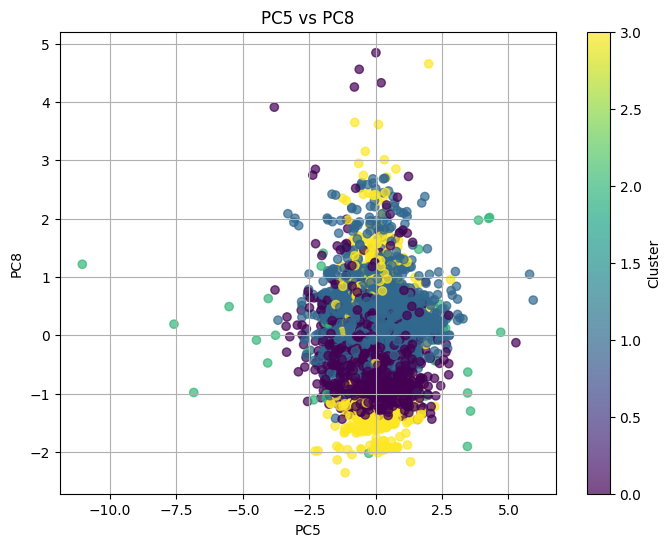

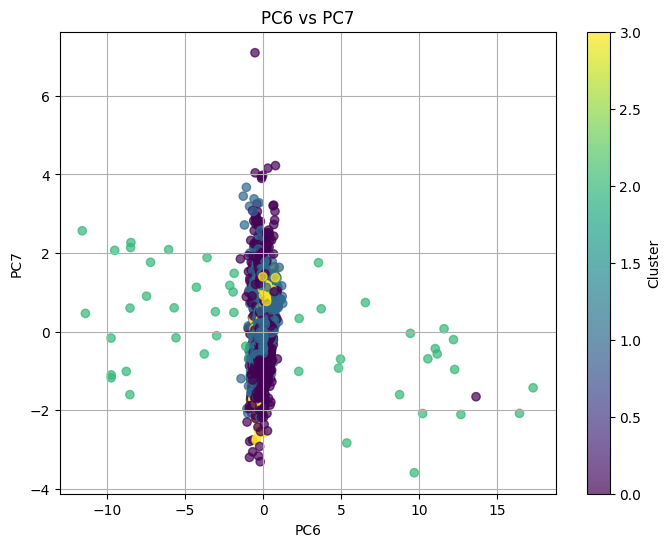

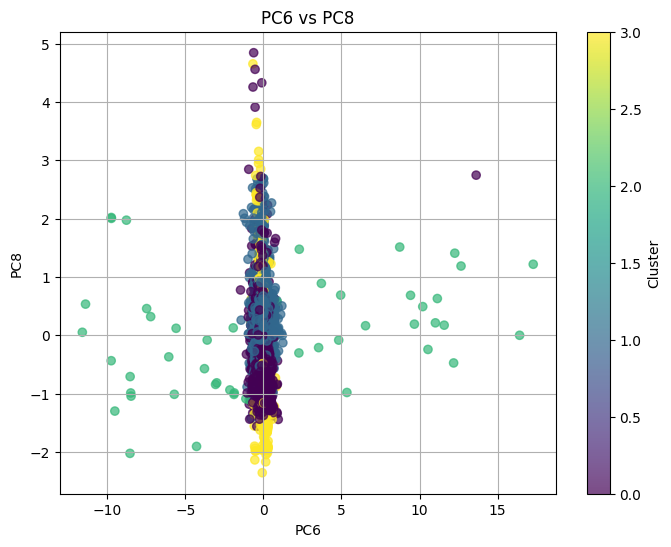

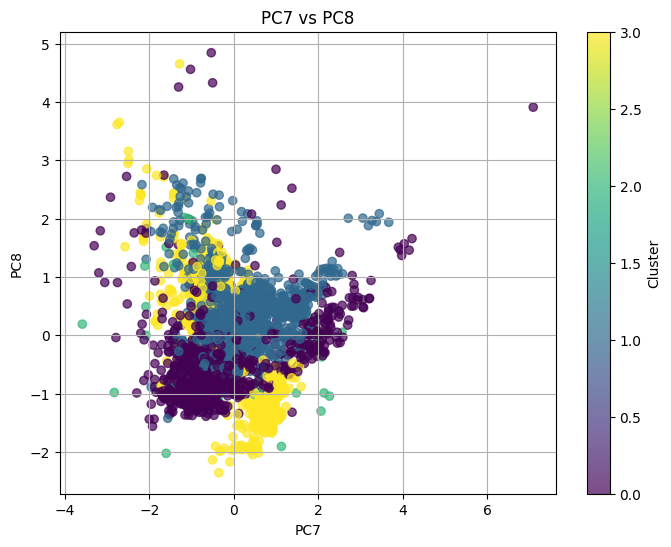

In [586]:
def plot_pca_pairs(pca_result, components):
    num_c = pca_result.shape[1]

    # process each pair of PC-variables
    for i in range(num_c):
        for j in range(i + 1, num_c):
            plt.figure(figsize=(8, 6))
            plt.scatter(pca_result[:, i], pca_result[:, j], alpha=0.7)
            plt.title(f"PC{i+1} vs PC{j+1}")
            plt.xlabel(f"PC{i+1}")
            plt.ylabel(f"PC{j+1}")
            plt.grid(True)
            plt.show()


def plot_pca_pairs_with_clustering(pca_result, components, n_clusters=3):
    num_c = pca_result.shape[1]
    
    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(pca_result)
    
    # Process each pair of PC-variables and plot clusters
    for i in range(num_c):
        for j in range(i + 1, num_c):
            plt.figure(figsize=(8, 6))
            scatter = plt.scatter(pca_result[:, i], pca_result[:, j], c=cluster_labels, cmap='viridis', alpha=0.7)
            plt.title(f"PC{i+1} vs PC{j+1}")
            plt.xlabel(f"PC{i+1}")
            plt.ylabel(f"PC{j+1}")
            plt.grid(True)
            plt.colorbar(scatter, label='Cluster')
            plt.show()

# plot_pca_pairs(X_pca, pca.components_)
# we can also use KMeans to visualize how well the data can be differentiated
# 3 is a good number to begin with for clusters, try also 6 (amount of options in the target)
plot_pca_pairs_with_clustering(X_pca, pca.components_, n_clusters=4)

<Axes: xlabel='monthlyHoaFee', ylabel='Count'>

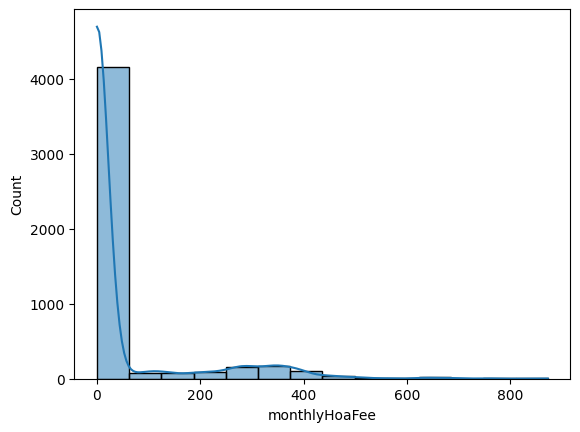

In [587]:
sns.histplot(data=df, x="monthlyHoaFee", kde=True)

In [588]:
#outlier 45k
#Pce 5,6,7 have a strong influence from monthlyHoaFee
df=df.drop(index=369)
df=df.drop(index=3631)
df=df.drop(index=3632)
df=df.drop(index=3633)
df=df.drop(index=3634)
df=df.drop(index=1186)
df=df.drop(index=3993)

#lomngitude
df=df.drop(index=1168)
df=df.drop(index=1169)

#anual homeowner insurance
df=df.drop(index=953)
df=df.drop(index=1164)

# rent zestimate
df=df.drop(index=1192)

# living area
df=df.drop(index=3435)
df=df.drop(index=3263)

# tax rate
df=df.drop(index=1179)
df=df.drop(index=1218)

df=df.drop(index=1215)
df=df.drop(index=1173)
df=df.drop(index=3975)
df=df.drop(index=1214)
df=df.drop(index=1209)
df=df.drop(index=1175)

df=df.drop(index=1212)
df=df.drop(index=1167)
df=df.drop(index=1196)
df=df.drop(index=1210)
df=df.drop(index=1229)

# bedroom/bathrooms
df=df.drop(index=2406)

KeyError: '[369] not found in axis'

pc1 vs pc 6 has a huge outlier
<p>A lot of the times, there are mainly 2 maximal 3 cluster, yellow is often on its own while the other colors overlay</p>

In [ ]:
df.to_csv('Prepared_Zillow.csv', index=False)

<b>Classification, Almonds</b>

In [590]:
df = pd.read_csv("Clean_Almond.csv")

<b>Exercise 1+2</b>

In [591]:
dropable=["Convex_Area", "Thickness", "Perimeter"]
df=df.drop(dropable,axis=1)

In [592]:
df.head()

Length       Width     Area  Roundness  Solidity  Compactness  \
0  272.553253  227.940628  22619.0   0.460467  0.973384     1.458265   
1  340.942719  234.188126  23038.0   0.451983  0.957304     1.601844   
2  344.597992  229.418610  22386.5   0.178304  0.967270     1.487772   
3  367.850677  232.763153  22578.5   0.547965  0.965512     1.540979   
4  276.140106  230.150742  19068.0   0.430272  0.951450     1.629395   

   Aspect_Ratio  Eccentricity    Extent   Type  
0      1.565795      0.798147  0.681193  MAMRA  
1      1.552992      0.755233  0.656353  MAMRA  
2      1.696236      0.845151  0.683620  MAMRA  
3      1.942538      0.806122  0.685360  MAMRA  
4      2.142503      0.844623  0.714800  MAMRA

<b>Excercise 3</b>

In [593]:
X = df.drop(["Type"], axis=1)
# Encoding Y for Later
y_temp = df['Type']
le = LabelEncoder()
y_enc = le.fit_transform(y_temp)
y = tf.keras.utils.to_categorical(y_enc)
df['Type']=y_enc


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# create Kmeans-instance and train it with data
kmeans = KMeans(n_clusters=6, random_state=42)

# place the cluster values back to DataFrame
df['cluster'] = kmeans.fit_predict(X_scaled)

df.head(6)

Length       Width     Area  Roundness  Solidity  Compactness  \
0  272.553253  227.940628  22619.0   0.460467  0.973384     1.458265   
1  340.942719  234.188126  23038.0   0.451983  0.957304     1.601844   
2  344.597992  229.418610  22386.5   0.178304  0.967270     1.487772   
3  367.850677  232.763153  22578.5   0.547965  0.965512     1.540979   
4  276.140106  230.150742  19068.0   0.430272  0.951450     1.629395   
5  315.898743  231.914429  19335.0   0.605619  0.957344     1.558628   

   Aspect_Ratio  Eccentricity    Extent  Type  cluster  
0      1.565795      0.798147  0.681193     0        0  
1      1.552992      0.755233  0.656353     0        1  
2      1.696236      0.845151  0.683620     0        1  
3      1.942538      0.806122  0.685360     0        2  
4      2.142503      0.844623  0.714800     0        3  
5      1.740388      0.814227  0.727920     0        0

In [594]:
df['cluster'].value_counts()

cluster
5    781
0    703
1    415
3    387
2    301
4    216
Name: count, dtype: int64

In [595]:
cluster_counts = df.groupby(['Type', 'cluster']).size().unstack(fill_value=0)
print(cluster_counts)

cluster    0    1    2    3    4    5
Type                                 
0        164  187  165  147  149  121
1        257   90   64  138   35  343
2        282  138   72  102   32  317


In [596]:
# calculate the average of quality for each cluster
cluster_Type_average = df.groupby('cluster')['Type'].mean()

# place the averages based on clusters back into DataFrame
df['cluster_average_Type'] = df['cluster'].map(cluster_Type_average)

df.head(10)

Length       Width     Area  Roundness  Solidity  Compactness  \
0  272.553253  227.940628  22619.0   0.460467  0.973384     1.458265   
1  340.942719  234.188126  23038.0   0.451983  0.957304     1.601844   
2  344.597992  229.418610  22386.5   0.178304  0.967270     1.487772   
3  367.850677  232.763153  22578.5   0.547965  0.965512     1.540979   
4  276.140106  230.150742  19068.0   0.430272  0.951450     1.629395   
5  315.898743  231.914429  19335.0   0.605619  0.957344     1.558628   
6  195.676468  226.371048  18583.5   0.386679  0.956286     1.614212   
7  227.627579  226.186142  18069.5   0.257667  0.968978     1.506426   
8  413.477173  133.728958  41492.0   0.309009  0.950986     2.232834   
9  418.210327  156.352112  40630.5   0.295783  0.955888     2.116056   

   Aspect_Ratio  Eccentricity    Extent  Type  cluster  cluster_average_Type  
0      1.565795      0.798147  0.681193     0        0              1.167852  
1      1.552992      0.755233  0.656353     0        1              0.881928  
2      1.696236      0.845151  0.683620     0        1              0.881928  
3      1.942538      0.806122  0.685360     0        2              0.691030  
4      2.142503      0.844623  0.714800     0        3              0.883721  
5      1.740388      0.814227  0.727920     0        0              1.167852  
6      2.134406      0.808327  0.727908     0        3              0.883721  
7      1.688412      0.876796  0.740675     0        0              1.167852  
8      1.731157      0.798828  0.767645     0        1              0.881928  
9      1.647175      0.822175  0.758598     0        1              0.881928

In [597]:
correlation = df['Type'].corr(df['cluster_average_Type'])
correlation



0.3028733046787749

In [598]:


# Calculate the Phi-K correlation between two columns
correlation = df[['Type', 'cluster_average_Type']].phik_matrix().iloc[0, 1]

print("Phi-K Correlation:", correlation)


interval columns not set, guessing: ['Type', 'cluster_average_Type']
Phi-K Correlation: 0.3143067716798567


<p>1. Run 32% wich is not a bad amount of information for a Machine learning model, but also not that signifiant</p>

<p>2. run with dropped columns 30% even worse</p>

<p>3. Run without dropped columns but phiks matrix 27%</p>

<p>4. Run with dropped columns and phiks 31%</p>

While dropping the collumns makes the phik better, i thinkit should not be dropped for now



<h3>PCA</h3>

In [599]:
#sample
#to make the copy code work
authentic_df = df.copy()
threshold = 53
sampled_data = []
for quality, group in authentic_df.groupby('Type'):
    # if a minority group, just add all the data
    if len(group) <= threshold:
        sampled_data.append(group)
    else:
        sampled_data.append(group.sample(threshold))
authentic_sample = pd.concat(sampled_data)
authentic_df = authentic_df.drop(authentic_sample.index)

Explained variance ratio with 6 components, by each component:
[0.31020783 0.21455405 0.14892481 0.0918571  0.08052225 0.07272672]

Explained variance ratio with 6 components, total result:
0.9187927599658312

Mean Squared Error (MSE) between original and reconstructed data:
0.08120724003416907


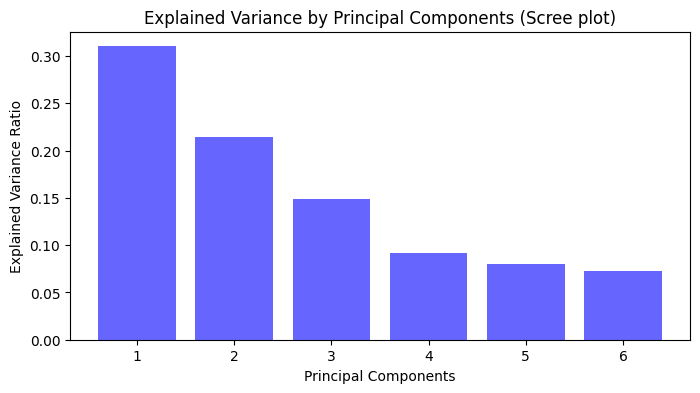

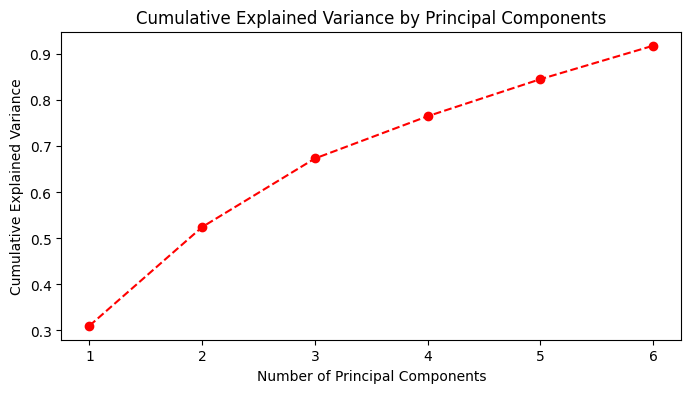

In [600]:
#As above
X = df.drop(["Type"], axis=1)
y_temp = df['Type']
le = LabelEncoder()
y_enc = le.fit_transform(y_temp)
y = tf.keras.utils.to_categorical(y_enc)
df['Type']=y_enc
#So below
#(no i am not in a cult)


num_components = 6

pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance ratio with {num_components} components, by each component:\n{explained_variance_ratio}")
print(f"\nExplained variance ratio with {num_components} components, total result:\n{sum(explained_variance_ratio)}")

X_reconstructed = pca.inverse_transform(X_pca)

mse = mean_squared_error(X_scaled, X_reconstructed)
print(f"\nMean Squared Error (MSE) between original and reconstructed data:\n{mse}")

plt.figure(figsize=(8, 4))
plt.bar(range(1, num_components + 1, ), explained_variance_ratio, alpha=0.6, color="b")
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance by Principal Components (Scree plot)")
plt.show()

cumulative_variance = explained_variance_ratio.cumsum()
plt.figure(figsize=(8, 4))
plt.plot(range(1, num_components + 1, ), cumulative_variance, marker="o", linestyle='--', color="r")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance by Principal Components")
plt.show()

92% perserved, only 8 lost
<p>2. run with dropped columnes 96% perserved, when 7 pce, i try removing 1 pce</p>
<p>3. run 6 pca, 92% perserved, i am not sure but i think fewer pca are better, so this makes up the decicion to keep the coolumns dropped</p>

In [601]:
df.head()

Length       Width     Area  Roundness  Solidity  Compactness  \
0  272.553253  227.940628  22619.0   0.460467  0.973384     1.458265   
1  340.942719  234.188126  23038.0   0.451983  0.957304     1.601844   
2  344.597992  229.418610  22386.5   0.178304  0.967270     1.487772   
3  367.850677  232.763153  22578.5   0.547965  0.965512     1.540979   
4  276.140106  230.150742  19068.0   0.430272  0.951450     1.629395   

   Aspect_Ratio  Eccentricity    Extent  Type  cluster  cluster_average_Type  
0      1.565795      0.798147  0.681193     0        0              1.167852  
1      1.552992      0.755233  0.656353     0        1              0.881928  
2      1.696236      0.845151  0.683620     0        1              0.881928  
3      1.942538      0.806122  0.685360     0        2              0.691030  
4      2.142503      0.844623  0.714800     0        3              0.883721

In [602]:
print("Columns of X:", X.columns.tolist())
#print("Columns of X_scaled:", X_scaled.columns.tolist())
#print("Shape of PCA components (loadings.T):", loadings.T.shape)
#debug cuz for some reason  that thing expects 11,6 but only gets 9,6

#seems like the bug is that this is a numpy array no pandas array

Columns of X: ['Length', 'Width', 'Area', 'Roundness', 'Solidity', 'Compactness', 'Aspect_Ratio', 'Eccentricity', 'Extent', 'cluster', 'cluster_average_Type']


In [603]:
# Scale the data but retain the column names
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
num_components = 6
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_scaled)

# Debug information
print("Shape of X_scaled:", X_scaled.shape)  # NumPy array, no columns
print("Shape of PCA components (loadings.T):", pca.components_.T.shape)

# Create the loadings DataFrame (restore column names from original X)
loadings_df = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i + 1}" for i in range(pca.components_.shape[0])],
    index=X.columns  # Use original DataFrame's column names
)


Shape of X_scaled: (2803, 11)
Shape of PCA components (loadings.T): (11, 6)


In [604]:
# scale the test data 
#X_test_scaled = scaler_pca.transform(X_test)
#X_test_pca = pca.transform(X_test_scaled)
#X_test_reconstructed = pca.inverse_transform(X_test_pca)

In [605]:
loadings_df

PC1       PC2       PC3       PC4       PC5  \
Length               -0.206167  0.494604  0.109181 -0.098383 -0.423338   
Width                -0.087453  0.370342  0.053477 -0.512428  0.555833   
Area                  0.009532  0.541879  0.377700 -0.020036 -0.012944   
Roundness             0.326607 -0.007969  0.446542  0.130276  0.463325   
Solidity              0.464282  0.235571 -0.212999  0.028607 -0.103367   
Compactness          -0.452966 -0.150788  0.230335 -0.045032  0.007491   
Aspect_Ratio         -0.164927  0.222954 -0.157736  0.607465  0.101893   
Eccentricity         -0.151380  0.226126 -0.343752  0.412573  0.451298   
Extent                0.398586  0.309639 -0.070480  0.089427 -0.235068   
cluster               0.125122 -0.120660  0.621044  0.375978 -0.069299   
cluster_average_Type  0.444640 -0.187109 -0.105024 -0.137593  0.110206   

                           PC6  
Length               -0.138128  
Width                 0.353678  
Area                 -0.179326  
Roundness            -0.094571  
Solidity              0.065918  
Compactness          -0.152813  
Aspect_Ratio          0.640400  
Eccentricity         -0.603307  
Extent               -0.059477  
cluster               0.059141  
cluster_average_Type -0.076864

<Axes: >

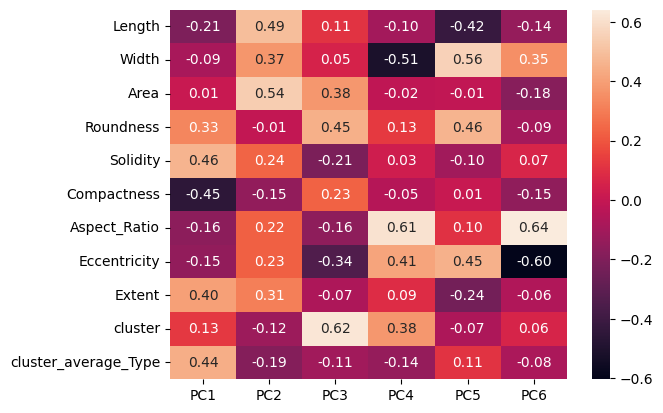

In [606]:
sns.heatmap(loadings_df, annot=True, fmt=".2f")

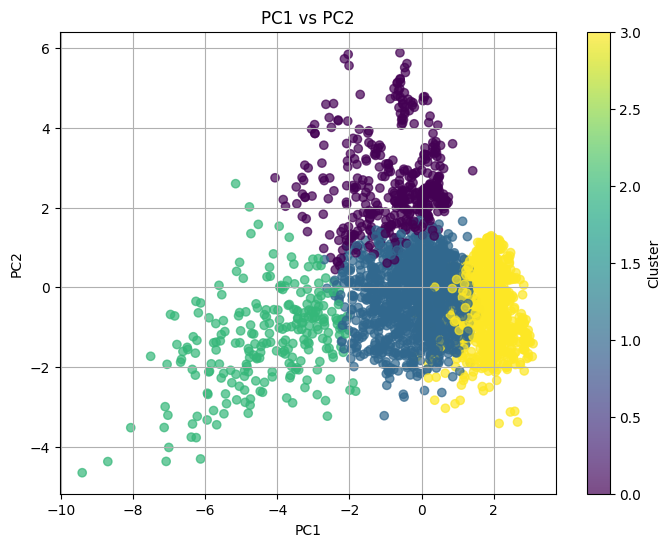

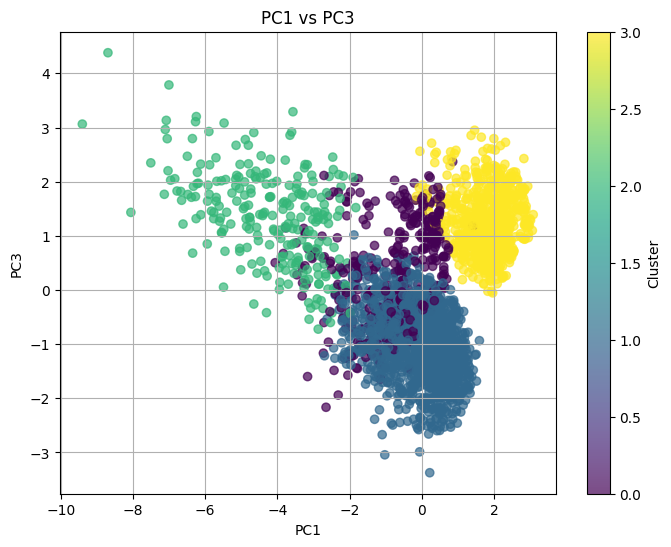

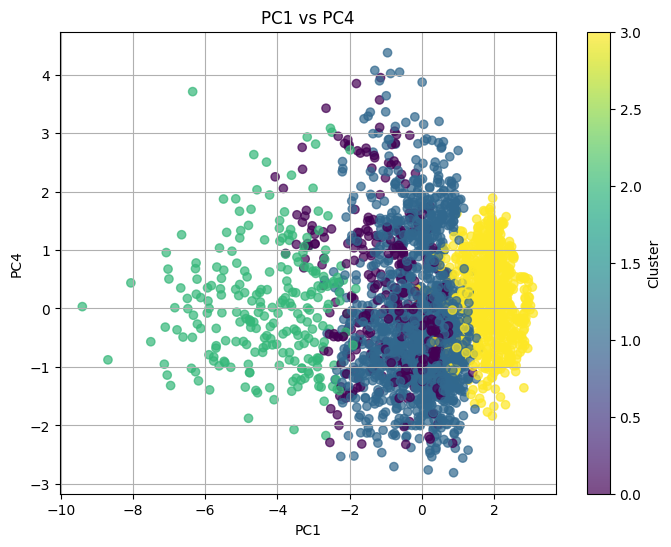

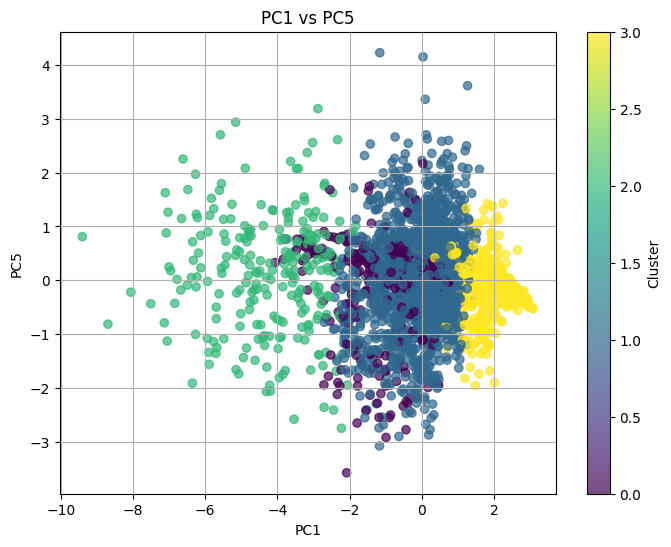

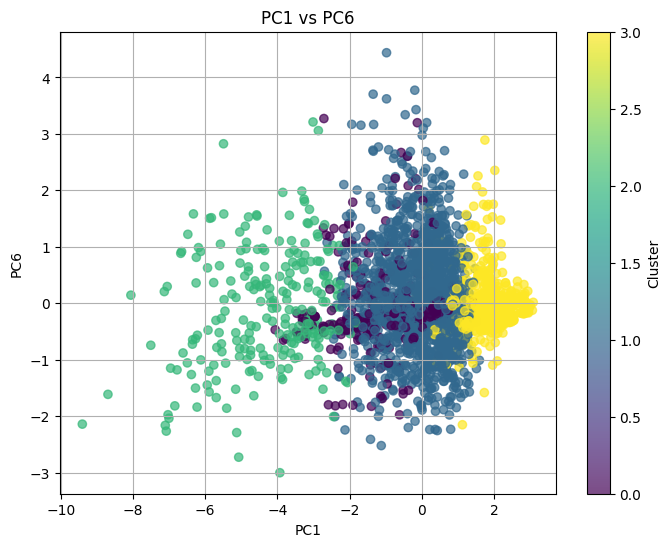

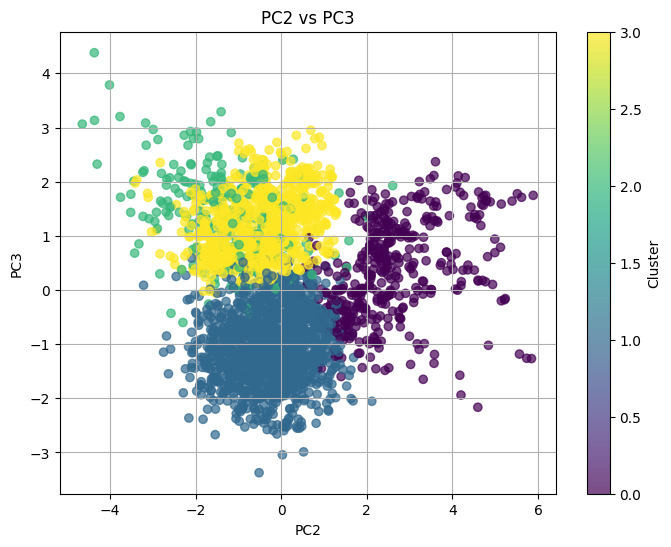

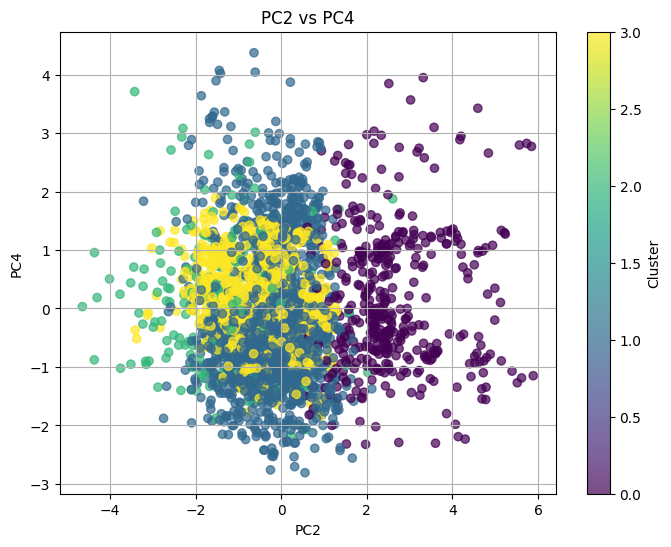

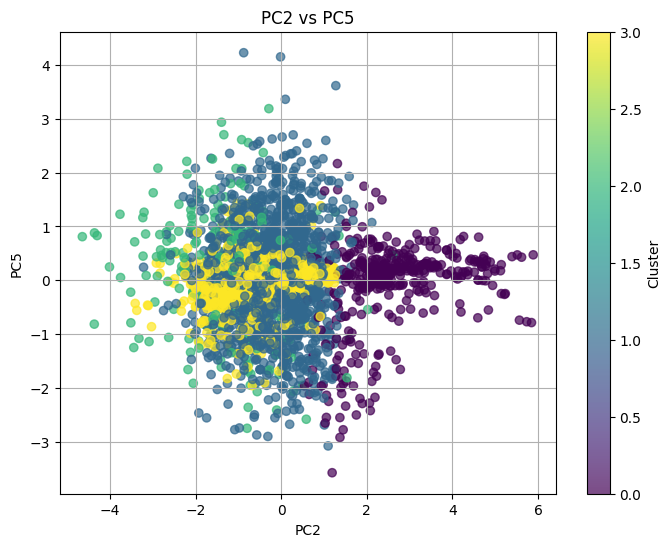

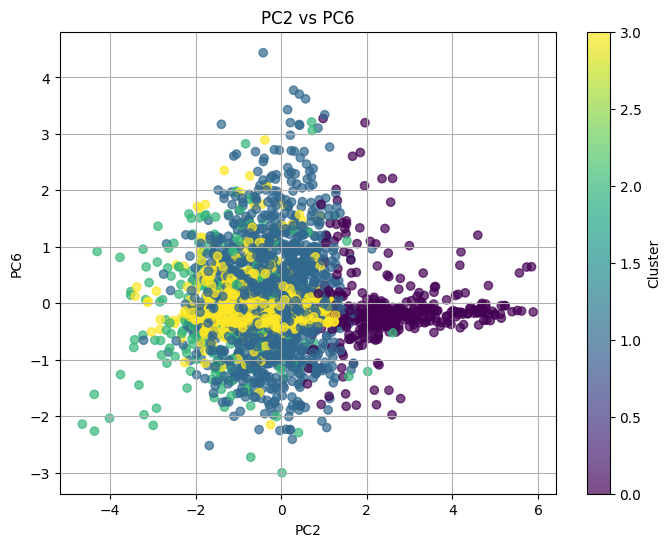

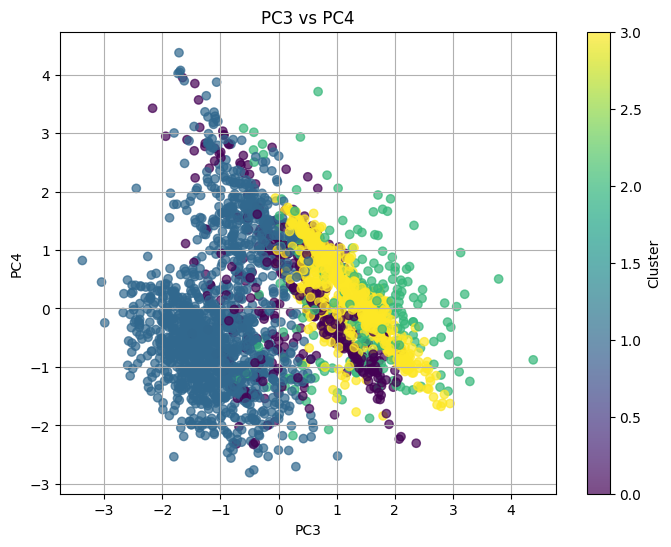

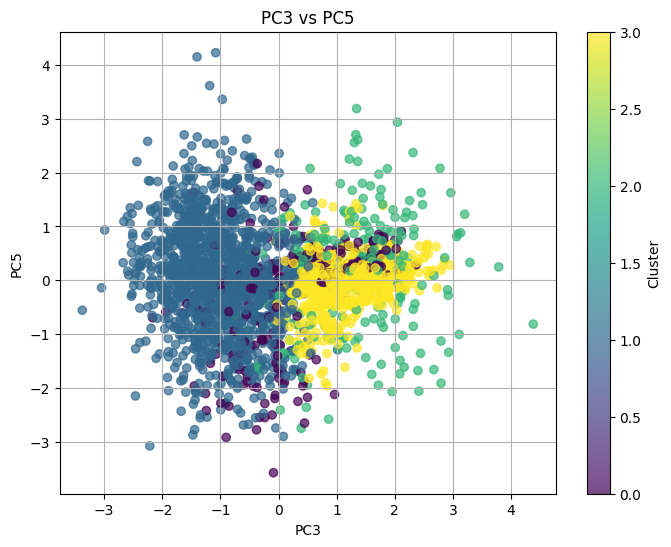

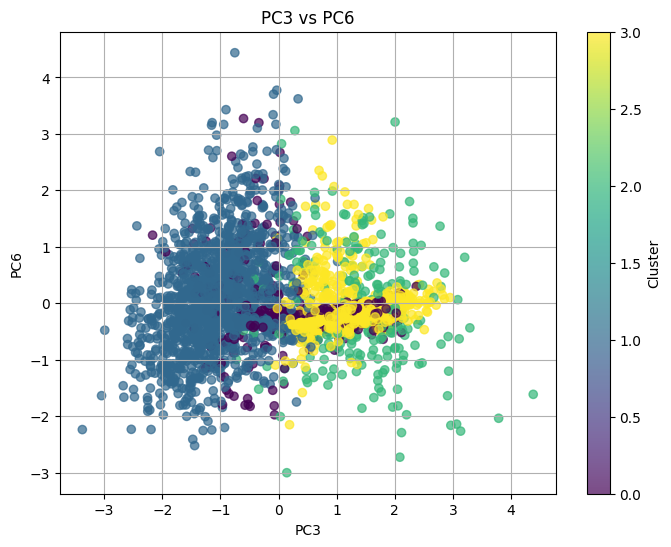

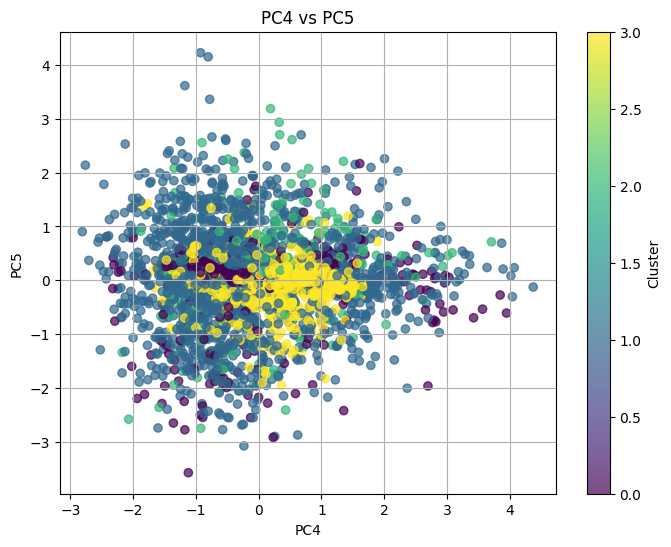

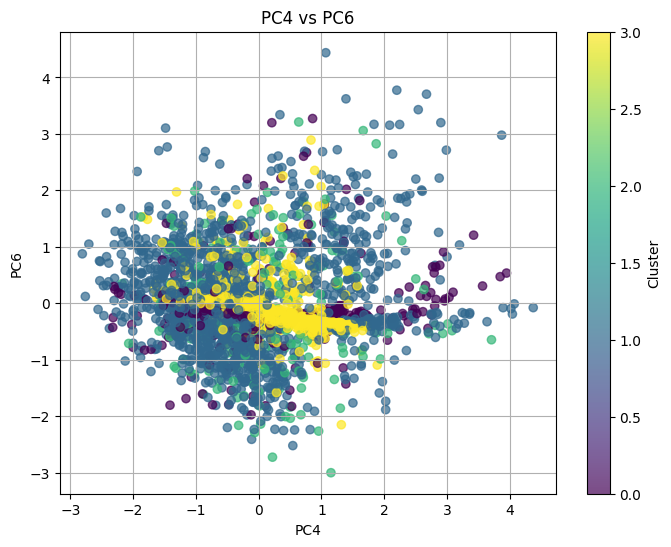

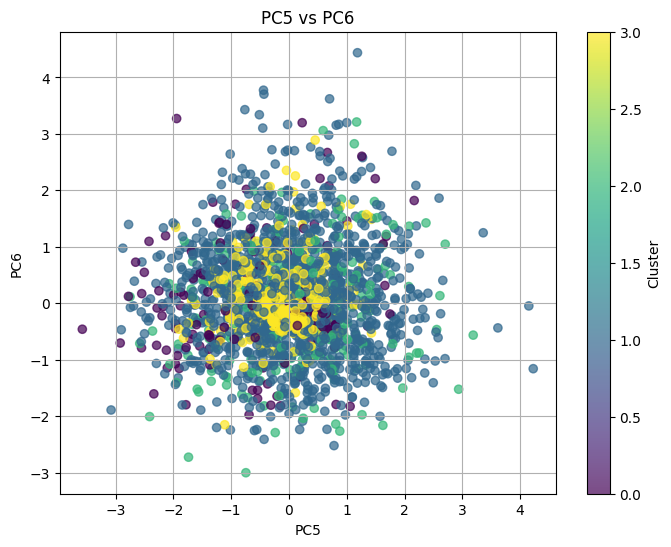

In [607]:
def plot_pca_pairs(pca_result, components):
    num_c = pca_result.shape[1]

    # process each pair of PC-variables
    for i in range(num_c):
        for j in range(i + 1, num_c):
            plt.figure(figsize=(8, 6))
            plt.scatter(pca_result[:, i], pca_result[:, j], alpha=0.7)
            plt.title(f"PC{i+1} vs PC{j+1}")
            plt.xlabel(f"PC{i+1}")
            plt.ylabel(f"PC{j+1}")
            plt.grid(True)
            plt.show()


def plot_pca_pairs_with_clustering(pca_result, components, n_clusters=3):
    num_c = pca_result.shape[1]
    
    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(pca_result)
    
    # Process each pair of PC-variables and plot clusters
    for i in range(num_c):
        for j in range(i + 1, num_c):
            plt.figure(figsize=(8, 6))
            scatter = plt.scatter(pca_result[:, i], pca_result[:, j], c=cluster_labels, cmap='viridis', alpha=0.7)
            plt.title(f"PC{i+1} vs PC{j+1}")
            plt.xlabel(f"PC{i+1}")
            plt.ylabel(f"PC{j+1}")
            plt.grid(True)
            plt.colorbar(scatter, label='Cluster')
            plt.show()

# plot_pca_pairs(X_pca, pca.components_)
# we can also use KMeans to visualize how well the data can be differentiated
# 3 is a good number to begin with for clusters, try also 6 (amount of options in the target)
plot_pca_pairs_with_clustering(X_pca, pca.components_, n_clusters=4)

<p> Often the clusters overlay, or split into a maximum of 4, heatmap looking good</p>

<p>The cluster are strongly overlacking wich is kind of very bad</p>

In [608]:
# Compactness
df=df.drop(index=655)
df=df.drop(index=370)
df=df.drop(index=2145)
df=df.drop(index=2018)

# aspect ratio
df=df.drop(index=1234)
df=df.drop(index=543)
df=df.drop(index=2486)

# eccentricity
df=df.drop(index=661)
df=df.drop(index=1716)
df=df.drop(index=2283)
df=df.drop(index=2035)
df=df.drop(index=2280)
df=df.drop(index=556)
df=df.drop(index=1752)

# extend
df=df.drop(index=1033)
df=df.drop(index=1359)
df=df.drop(index=88)
df=df.drop(index=1311)
df=df.drop(index=1312)
df=df.drop(index=1309)

df=df.drop(index=1161)
df=df.drop(index=1231)
df=df.drop(index=1229)
df=df.drop(index=1232)


In [609]:
df.to_csv('Prepared_Almond.csv', index=False)

<h1>Summary</h1>
<p>Bot hdatasets used clustering, it feels like i need to use the PCA components instead of the normal data, but i do not know how, and the github only showed something for the redwine one, but even there didnt show it well enough for me to copy</p>